In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('real_estate_price_size_year.csv')

In [3]:
df.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [4]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [5]:
df.isnull().sum()

price    0
size     0
year     0
dtype: int64

E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size'>

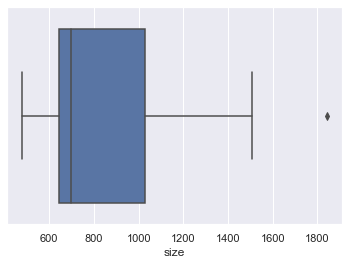

In [6]:
sns.boxplot('size', data = df)

E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

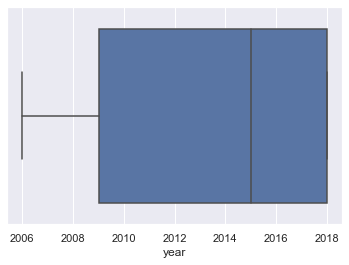

In [7]:
sns.boxplot('year',data = df)

In [8]:
inputs = df.drop('price', axis =1)

In [9]:
target = pd.DataFrame(df['price'])

In [10]:
inputs

,size,year
0,643.09,2015
1,656.22,2009
2,487.29,2018
3,1504.75,2015
4,1275.46,2009
...,...,...
95,549.80,2009
96,1037.44,2009
97,1504.75,2006
98,648.29,2015


In [11]:
target

,price
0,234314.144
1,228581.528
2,281626.336
3,401255.608
4,458674.256
...,...
95,252460.400
96,310522.592
97,383635.568
98,225145.248


In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf = RandomForestRegressor()

In [14]:
rf.fit(inputs,target)

C:\Users\Asheesh\AppData\Local\Temp/ipykernel_20696/558859465.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(inputs,target)


RandomForestRegressor()

In [15]:
predict = rf.predict(inputs)

In [16]:
rf.score(inputs,target)

0.921435617316456

In [17]:
import pickle

In [18]:
pickle.dump(rf,open('model.pkl','wb'))

In [19]:
filename = 'model.pkl'

In [20]:
loaded_model = pickle.load(open(filename, 'rb'))

In [21]:
inputs

,size,year
0,643.09,2015
1,656.22,2009
2,487.29,2018
3,1504.75,2015
4,1275.46,2009
...,...,...
95,549.80,2009
96,1037.44,2009
97,1504.75,2006
98,648.29,2015


In [22]:
loaded_model.predict([['645','2015']])

array([243282.21996])

In [23]:
df.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [24]:
from flask import Flask,jsonify,render_template,request

In [25]:
app = Flask(__name__)

In [26]:
@app.route('/')
def home():
    return render_template('web_index.html')

In [27]:
@app.route('/predict', methods=['POST'])
def predict():
    int_features = [int(x) for x in request.form.values()]
    final_features = np.array(int_features)
    prediction = model.predict(final_features)
    output = round(prediction[0],2)
    return render_template('web_index.html',prediction_text = output)

In [28]:
if  __name__ == "main" :
    app.run(debug = True )
else:
    print('wrong')

wrong
